--- KẾT QUẢ TỐI ƯU (Dữ liệu 1990 - 2020) ---
Hệ số tăng trưởng (a): 0.030525
Hệ số cản trở (b): 0.0002090362
Sức chứa môi trường (K): 146.03 triệu người


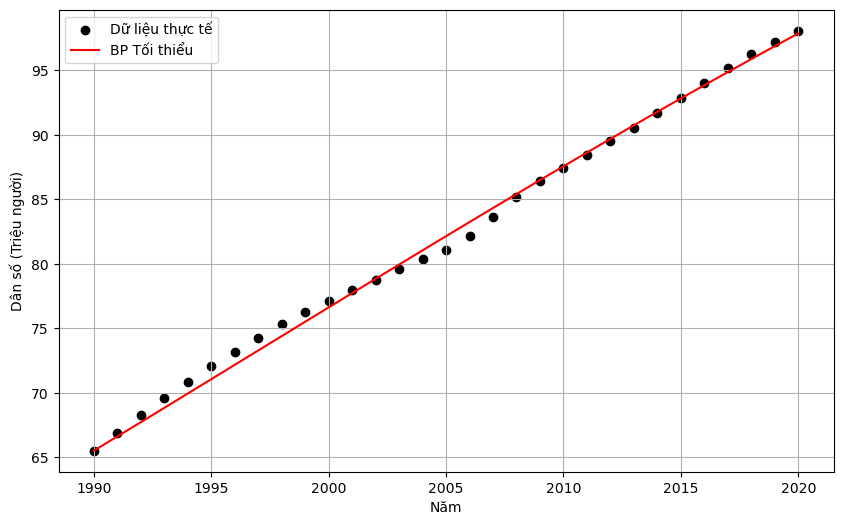

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- BƯỚC 1: NHẬP DỮ LIỆU ĐẦY ĐỦ (1990 - 2024) ---
# Tạo mảng năm liên tục từ 1990 đến 2024 (35 năm)
years_all = np.arange(1990, 2025)

# Dữ liệu dân số đầy đủ tương ứng với từng năm từ 1990 đến 2024
population_all = np.array([
    65504552, 66891775, 68260337, 69586384, 70864391, 72049940, 73156447, 74226889, 75299660, 76287452, # 1990-1999
    77154011, 77969361, 78772224, 79563777, 80338971, 81088313, 82167897, 83633375, 85175788, 86460018, # 2000-2009
    87455152, 88468314, 89510356, 90573104, 91679578, 92823254, 94000117, 95176977, 96237319, 97173776, # 2010-2019
    98079191, 98935098, 99680655, 100352192, 100987686 # 2020-2024
]) / 1e6 

# --- BƯỚC 2: CẮT DỮ LIỆU ĐỂ LUYỆN TẬP MÔ HÌNH (Đến năm 2020) ---
# Năm 2020 là phần tử thứ 31 (từ chỉ số 0 đến 30)
years = years_all[:31]
population = population_all[:31]

t_data = years - years[0] # mốc t=0 là năm 1990
P_data = population
P0 = P_data[0] 

# --- BƯỚC 3: KHỚP MÔ HÌNH ---
def logistic_solution(t, a, b):
    K = a/b
    term = (K / P0 - 1) * np.exp(-a * t)
    return K / (1 + term)

# Dùng kết quả tối ưu từ báo cáo làm gợi ý để máy tính tìm nhanh hơn
initial_guess = [0.02, 0.0001] 
params, cov = curve_fit(logistic_solution, t_data, P_data, p0=initial_guess, bounds=(0, [1, 1]))

a_fit, b_fit = params
K_fit = a_fit / b_fit

print(f"--- KẾT QUẢ TỐI ƯU (Dữ liệu 1990 - 2020) ---")
print(f"Hệ số tăng trưởng (a): {a_fit:.6f}")
print(f"Hệ số cản trở (b): {b_fit:.10f}")
print(f"Sức chứa môi trường (K): {K_fit:.2f} triệu người")

plt.figure(figsize=(10, 6))



# Dữ liệu thực tế

plt.scatter(years, P_data, color='black', label='Dữ liệu thực tế')



# Đường dự báo

P_pred_2 = logistic_solution(t_data, a_fit, b_fit)

plt.plot(years, P_pred_2, color='red', label='BP Tối thiểu')



plt.xlabel('Năm')

plt.ylabel('Dân số (Triệu người)')

plt.legend()

plt.grid(True)

plt.show()

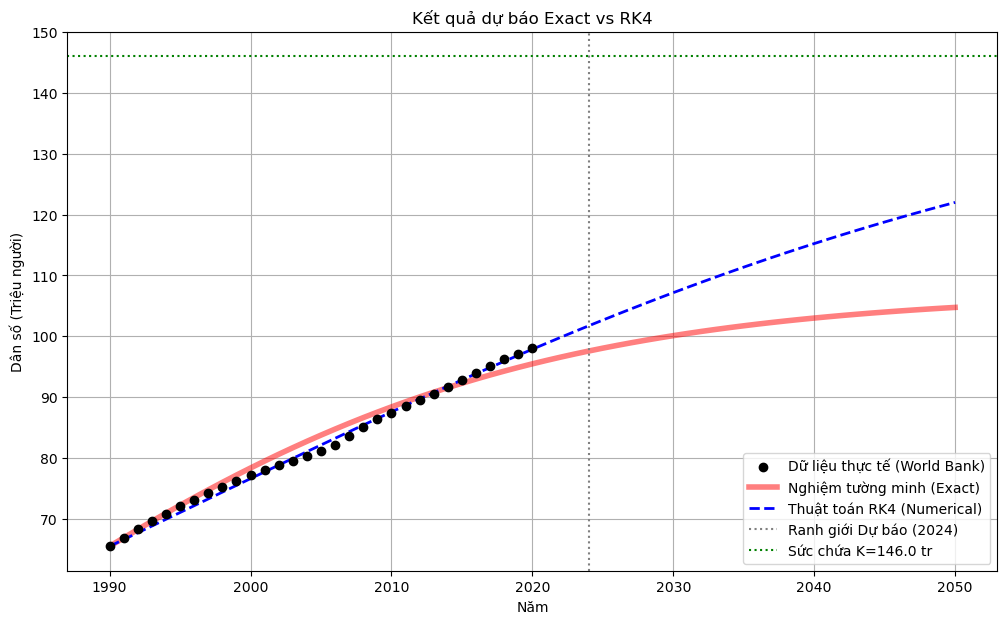

Lỗi tối đa của RK4 so với lý thuyết: 0.0000000464 triệu người
Lỗi tối đa của Euler so với lý thuyết: 0.1805 triệu người


In [5]:
import numpy as np
import matplotlib.pyplot as plt


years_all = np.arange(1990, 2025)

# Dữ liệu dân số đầy đủ tương ứng với từng năm từ 1990 đến 2024
population_all = np.array([
    65504552, 66891775, 68260337, 69586384, 70864391, 72049940, 73156447, 74226889, 75299660, 76287452, # 1990-1999
    77154011, 77969361, 78772224, 79563777, 80338971, 81088313, 82167897, 83633375, 85175788, 86460018, # 2000-2009
    87455152, 88468314, 89510356, 90573104, 91679578, 92823254, 94000117, 95176977, 96237319, 97173776, # 2010-2019
    98079191, 98935098, 99680655, 100352192, 100987686 # 2020-2024
]) / 1e6 

years = years_all[:31]
population = population_all[:31]

a = 0.054752597
K_0 = 107248762 / 1e6 # 109 triệu người 

#Runge-kutta 4 + Euler
a_1 = 0.030525     # Tốc độ tăng trưởng
b_1 = 0.0002090362   # Hệ số cạnh tranh
K = a_1 / b_1          # Sức chứa môi trường (~192.61)
N0 = population[0]        # Dân số gốc năm 2000

# Thời gian dự báo (2000 -> 2050)
t_start = 1990
t_end = 2050
h = 1 # Bước nhảy
t_eval = np.arange(t_start, t_end + 1, h)

#CÁCH 1: NGHIỆM TƯỜNG MINH (EXACT SOLUTION) 
def exact_solution(t):
    # Chuyển đổi t thực tế sang t tính từ 0 (2000 là mốc 0)
    t_norm = t - t_start 
    # Công thức: N(t) = K / (1 + (K/N0 - 1) * e^(-a*t))
    return K_0 / (1 + (K_0/N0 - 1) * np.exp(-a * t_norm))

N_exact = exact_solution(t_eval)

# Định nghĩa hàm đạo hàm dN/dt
def dN_dt(t, N):
    return a_1 * N - b_1 * N**2

# CÁCH 2: Euler
N_euler = [N0]
current_N_euler = N0

for t in t_eval[:-1]:
    # Tính đạo hàm tại thời điểm hiện tại
    dN = dN_dt(t, current_N_euler)
    # Cập nhật dân số sử dụng phương pháp Euler
    current_N_euler += h * dN
    N_euler.append(current_N_euler)

N_euler = np.array(N_euler)

# CÁCH 3: Ruge-Kutta 4 
N_rk4 = [N0]
current_N = N0

# Chạy vòng lặp RK4
for t in t_eval[:-1]:
    k1 = h * dN_dt(t, current_N)
    k2 = h * dN_dt(t + 0.5*h, current_N + 0.5*k1)
    k3 = h * dN_dt(t + 0.5*h, current_N + 0.5*k2)
    k4 = h * dN_dt(t + h, current_N + k3)
    
    current_N += (k1 + 2*k2 + 2*k3 + k4) / 6.0
    N_rk4.append(current_N)

N_rk4 = np.array(N_rk4)

# --- 4. VẼ BIỂU ĐỒ SO SÁNH ---
plt.figure(figsize=(12, 7))

# Vẽ dữ liệu thực tế (Chấm tròn đen)
plt.scatter(years, population, color='black', label='Dữ liệu thực tế (World Bank)', zorder=5)

# Vẽ đường Nghiệm tường minh (Nét liền đỏ)
plt.plot(t_eval, N_exact, 'r-', linewidth=4, alpha=0.5, label='Nghiệm tường minh (Exact)')

# Vẽ đường RK4 (Nét đứt xanh dương) - Vẽ đè lên để thấy sự trùng khớp
plt.plot(t_eval, N_rk4, 'b--', linewidth=2, label='Thuật toán RK4 (Numerical)')

#plt.plot(t_eval, N_euler, 'm-.', linewidth=2, label='Thuật toán Euler (Numerical)')

# Đường Sức chứa K
plt.axvline(x=2024, color='gray', linestyle=':', label='Ranh giới Dự báo (2024)')
plt.axhline(y=K, color='green', linestyle=':', label=f'Sức chứa K={K:.1f} tr')

#plt.title('So sánh kết quả dự báo: RK4 vs Nghiệm tường minh')
plt.title("Kết quả dự báo Exact vs RK4")
plt.xlabel('Năm')
plt.ylabel('Dân số (Triệu người)')
plt.legend()
plt.grid(True)
plt.show()

# --- 5. KIỂM TRA SAI SỐ GIỮA 2 CÁCH ---
def validation_exact(t):
    t_norm = t - t_start 
    return K / (1 + (K/N0 - 1) * np.exp(-a_1 * t_norm))

N_val = validation_exact(t_eval)
error_rk4 = np.max(np.abs(N_val - N_rk4))
error_euler = np.max(np.abs(N_val - N_euler))

print(f"Lỗi tối đa của RK4 so với lý thuyết: {error_rk4:.10f} triệu người")
print(f"Lỗi tối đa của Euler so với lý thuyết: {error_euler:.4f} triệu người")

In [ ]:
import pandas as pd
df_total = pd.DataFrame({
    "Năm": t_eval,
    "Thực tế": [population_all[i] if i < len(population_all) else np.nan for i in range(len(t_eval))],
    "RK4 (Triệu)": N_rk4,
    "Exact (Triệu)": N_exact
})

df_total["Sai số RK4 (%)"] = np.abs((df_total["Thực tế"] - df_total["RK4 (Triệu)"]) / df_total["Thực tế"]) * 100

df_1990_2020 = df_total[df_total["Năm"] <= 2020].copy()
df_2021_2024 = df_total[(df_total["Năm"] >= 2021) & (df_total["Năm"] <= 2024)].copy()
df_forecast = df_total[df_total["Năm"] >= 2025][["Năm", "RK4 (Triệu)", "Exact (Triệu)"]].copy()
df_2021_2024[""]
print("="*30)
print("BẢNG 1: ĐÁNH GIÁ ĐỘ CHÍNH XÁC (1990 - 2020)")
print(df_1990_2020.to_string(index=False))

print("\n" + "="*30)
print("BẢNG 2: ĐÁNH GIÁ KẾT QUẢ SO VỚI THỰC TẾ (2021 - 2024)")
print(df_2021_2024.to_string(index=False))

print("\n" + "="*30)
print("BẢNG 3: DỰ BÁO TƯƠNG LAI (2025)")
print(df_forecast.to_string(index=False))

df_1990_2020.to_csv("danh_gia_do_chinh_xac_1990_2020.csv", index=False, encoding='utf-8-sig')
df_2021_2024.to_csv("danh_gia_ket_qua_so_voi_thuc_te_2021_2024.csv", index=False, encoding='utf-8-sig')
df_forecast.to_csv("du_bao_tuong_lai_20250.csv", index=False, encoding='utf-8-sig')

BẢNG 1: ĐÁNH GIÁ ĐỘ CHÍNH XÁC (1990 - 2020)
 Năm   Thực tế  RK4 (Triệu)  Exact (Triệu)  Sai số RK4 (%)
1990 65.504552    65.504552      65.504552        0.000000
1991 66.891775    66.608784      66.891775        0.423058
1992 68.260337    67.715976      68.260337        0.797478
1993 69.586384    68.825623      69.608604        1.093261
1994 70.864391    69.937215      70.935050        1.308381
1995 72.049940    71.050237      72.238263        1.387514
1996 73.156447    72.164173      73.516946        1.356373
1997 74.226889    73.278504      74.769926        1.277683
1998 75.299660    74.392713      75.996148        1.204451
1999 76.287452    75.506279      77.194684        1.023987
2000 77.154011    76.618685      78.364726        0.693841
2001 77.969361    77.729416      79.505587        0.307742
2002 78.772224    78.837960      80.616701        0.083451
2003 79.563777    79.943808      81.697616        0.477643
2004 80.338971    81.046457      82.747993        0.880626
2005 81.0883

In [31]:
df_1990_2020.to_csv("danh_gia_do_chinh_xac_1990_2020.csv", index=False, encoding='utf-8-sig')
df_2021_2024.to_csv("danh_gia_ket_qua_so_voi_thuc_te_2021_2024.csv", index=False, encoding='utf-8-sig')
df_forecast.to_csv("du_bao_tuong_lai_20250.csv", index=False, encoding='utf-8-sig')

In [32]:
# TÍNH TOÁN MAPE GIỮA DỰ BÁO VÀ DỮ LIỆU THỰC TẾ ---
n_data = len(population)  # = 25 năm (2000–2024)
N_exact_eval = N_exact[:n_data]
N_rk4_eval   = N_rk4[:n_data]
# MAPE nghiệm tường minh Logistic
mape_exact = np.mean(
    np.abs((population - N_exact_eval) / population)
) * 100

print(f"MAPE (Nghiệm tường minh Logistic): {mape_exact:.2f}%")

# MAPE Runge–Kutta bậc 4
mape_rk4 = np.mean(
    np.abs((population - N_rk4_eval) / population)
) * 100

print(f"MAPE (Runge-Kutta bậc 4): {mape_rk4:.2f}%")



MAPE (Nghiệm tường minh Logistic): 1.31%
MAPE (Runge-Kutta bậc 4): 0.59%


Hệ số đã tính:
α (tái tạo tài nguyên) = 0.0500
β (tiêu thụ) = 0.000625
γ (tử vong) = 0.0200
δ (tăng trưởng) = 0.000200
Điểm cân bằng: R=100.0, N=80.0

Kết quả mô phỏng:
Dân số - Min: 70.47, Max: 90.36, Cuối: 77.42
Tài nguyên - Min: 81.62, Max: 120.95, Cuối: 120.18


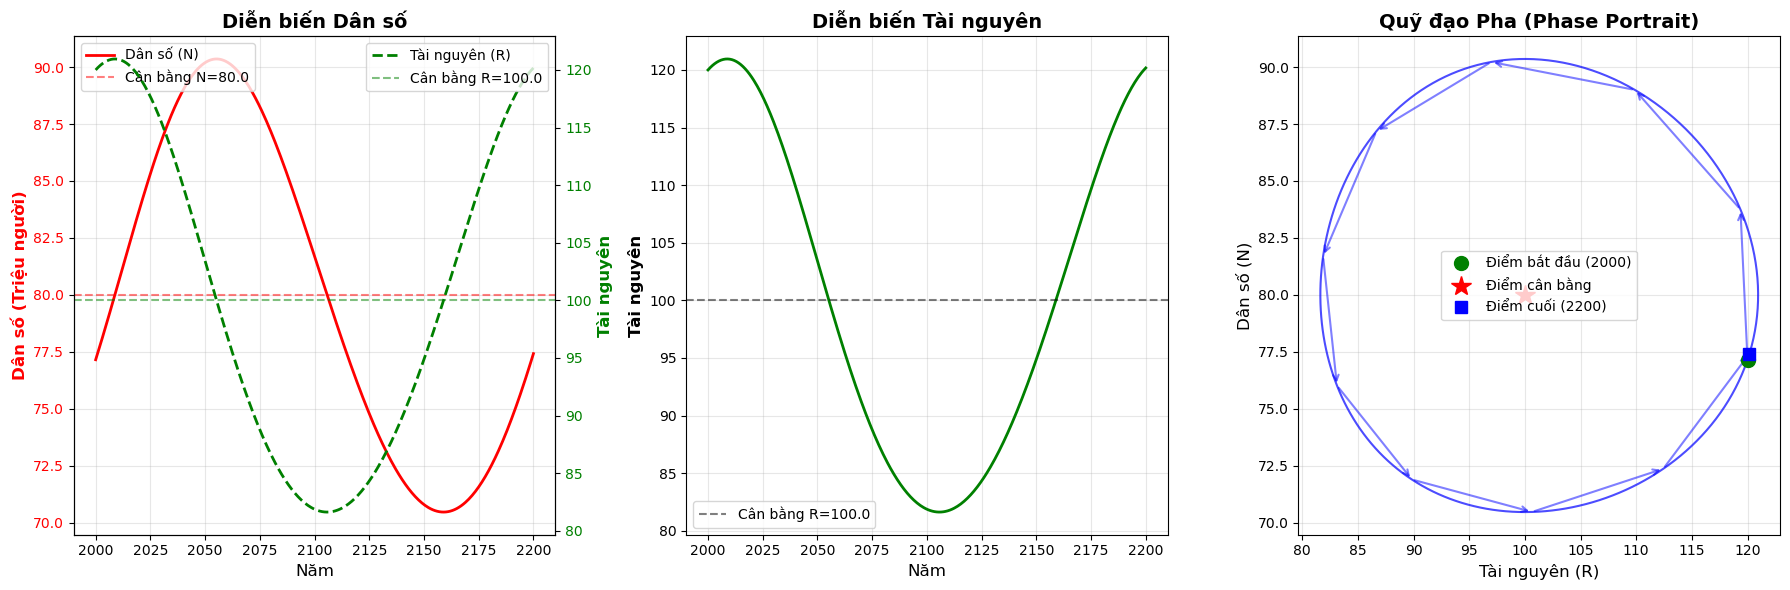

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. THIẾT LẬP THAM SỐ ---
# Trạng thái cân bằng mong muốn
N_eq = 80.0   # Dân số cân bằng (Triệu người)
R_eq = 100.0  # Tài nguyên cân bằng (Đơn vị)

# Hệ số tự nhiên (Giả định)
alpha = 0.05  # Tái tạo tài nguyên (5%)
gamma = 0.02  # Tử vong tự nhiên (2%)

# Tính toán hệ số tương tác từ điểm cân bằng
# R' = 0 => alpha*R - beta*R*N = 0 => beta = alpha / N_eq
# N' = 0 => delta*R*N - gamma*N = 0 => delta = gamma / R_eq
beta = alpha / N_eq   
delta = gamma / R_eq  


print(f"Hệ số đã tính:")
print(f"α (tái tạo tài nguyên) = {alpha:.4f}")
print(f"β (tiêu thụ) = {beta:.6f}")
print(f"γ (tử vong) = {gamma:.4f}")
print(f"δ (tăng trưởng) = {delta:.6f}")
print(f"Điểm cân bằng: R={R_eq}, N={N_eq}\n")

# Điều kiện ban đầu (Năm 2000)
t_start = 2000
t_end = 2200
h = 0.5

N0 = 77.154   # Dân số VN 2000
R0 = 120.0    # Tài nguyên cao hơn mức cân bằng

# --- 2. HỆ PHƯƠNG TRÌNH VI PHÂN ---
def sys_deriv(t, state):
    R, N = state
    
    # Lotka-Volterra cải tiến
    dRdt = alpha*R - beta*R*N
    dNdt = delta*R*N - gamma*N
    
    if R < 0:
        dRdt = 0
    if N < 0:
        dNdt = 0
    
    return np.array([dRdt, dNdt])

# --- 3. THUẬT TOÁN RK4 ---
def rk4_system(t_start, t_end, R0, N0, h):
    years = np.arange(t_start, t_end + h, h)
    states = []
    
    curr_state = np.array([R0, N0], dtype=float)
    states.append(curr_state.copy())
    
    for t in years[:-1]:
        k1 = h * sys_deriv(t, curr_state)
        k2 = h * sys_deriv(t + 0.5*h, curr_state + 0.5*k1)
        k3 = h * sys_deriv(t + 0.5*h, curr_state + 0.5*k2)
        k4 = h * sys_deriv(t + h, curr_state + k3)
        
        curr_state += (k1 + 2*k2 + 2*k3 + k4) / 6.0
        
        curr_state = np.maximum(curr_state, 0)
        
        states.append(curr_state.copy())
        
    return years, np.array(states)

# --- 4. CHẠY MÔ PHỎNG ---
years_sim, results = rk4_system(t_start, t_end, R0, N0, h)
R_vals = results[:, 0]
N_vals = results[:, 1]

#  In thống kê
print(f"Kết quả mô phỏng:")
print(f"Dân số - Min: {N_vals.min():.2f}, Max: {N_vals.max():.2f}, Cuối: {N_vals[-1]:.2f}")
print(f"Tài nguyên - Min: {R_vals.min():.2f}, Max: {R_vals.max():.2f}, Cuối: {R_vals[-1]:.2f}")

# --- 5. VẼ ĐỒ THỊ CẢI TIẾN ---
fig = plt.figure(figsize=(18, 6))

# Đồ thị 1: Diễn biến theo thời gian
ax1 = plt.subplot(1, 3, 1)
ax1.plot(years_sim, N_vals, 'r-', linewidth=2, label='Dân số (N)')
ax1.axhline(y=N_eq, color='r', linestyle='--', alpha=0.5, label=f'Cân bằng N={N_eq}')
ax1.set_xlabel('Năm', fontsize=12)
ax1.set_ylabel('Dân số (Triệu người)', color='red', fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left')
ax1.set_title('Diễn biến Dân số', fontsize=14, fontweight='bold')

# Trục phụ cho Tài nguyên
ax1_twin = ax1.twinx()
ax1_twin.plot(years_sim, R_vals, 'g--', linewidth=2, label='Tài nguyên (R)')
ax1_twin.axhline(y=R_eq, color='g', linestyle='--', alpha=0.5, label=f'Cân bằng R={R_eq}')
ax1_twin.set_ylabel('Tài nguyên', color='green', fontsize=12, fontweight='bold')
ax1_twin.tick_params(axis='y', labelcolor='green')
ax1_twin.legend(loc='upper right')

# Đồ thị 2: Chỉ Tài nguyên
ax2 = plt.subplot(1, 3, 2)
ax2.plot(years_sim, R_vals, 'g-', linewidth=2)
ax2.axhline(y=R_eq, color='k', linestyle='--', alpha=0.5, label=f'Cân bằng R={R_eq}')
ax2.set_xlabel('Năm', fontsize=12)
ax2.set_ylabel('Tài nguyên', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_title('Diễn biến Tài nguyên', fontsize=14, fontweight='bold')

# Đồ thị 3: Quỹ đạo Pha
ax3 = plt.subplot(1, 3, 3)
ax3.plot(R_vals, N_vals, 'b-', linewidth=1.5, alpha=0.7)
ax3.plot(R0, N0, 'go', markersize=10, label='Điểm bắt đầu (2000)', zorder=5)
ax3.plot(R_eq, N_eq, 'r*', markersize=15, label='Điểm cân bằng', zorder=5)
ax3.plot(R_vals[-1], N_vals[-1], 'bs', markersize=8, label='Điểm cuối (2200)', zorder=5)

# Vẽ hướng quỹ đạo
step = len(R_vals) // 10
for i in range(0, len(R_vals)-step, step):
    ax3.annotate('', xy=(R_vals[i+step], N_vals[i+step]), 
                xytext=(R_vals[i], N_vals[i]),
                arrowprops=dict(arrowstyle='->', color='blue', lw=1.5, alpha=0.5))

ax3.set_xlabel('Tài nguyên (R)', fontsize=12)
ax3.set_ylabel('Dân số (N)', fontsize=12)
ax3.set_title('Quỹ đạo Pha (Phase Portrait)', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend()

plt.tight_layout()
plt.show()

from scipy.signal import find_peaks

peaks_N, _ = find_peaks(N_vals, distance=20)
if len(peaks_N) > 1:
    periods = np.diff(years_sim[peaks_N])
    print(f"\nChu kỳ dao động trung bình: {periods.mean():.1f} năm")
    print(f"Số chu kỳ hoàn chỉnh: {len(peaks_N)-1}")